# Project Data Science : HR Attrition Rate Analytics

## Business Understanding

Building machine learning model to help Human Resource (HR) Department predict Attrition Rate

## Import necessary libraries

In [ ]:
!pip install psycopg2-binary scikit-learn==1.2.2 joblib==1.3.1

import scipy
import joblib
import psycopg2
import sqlalchemy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Understanding

The dataset used in this machine learning project is [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/). The dataset consists of 1470 records data with 35 features.

| Field                   | Description                                   |
|-------------------------|-----------------------------------------------|
| EmployeeId              | Employee Identifier                           |
| Attrition               | Did the employee attrition? (0=no, 1=yes)    |
| Age                     | Age of the employee                           |
| BusinessTravel          | Travel commitments for the job                |
| DailyRate               | Daily salary                                  |
| Department              | Employee Department                          |
| DistanceFromHome        | Distance from work to home (in km)           |
| Education               | 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor |
| EducationField          | Field of Education                           |
| EnvironmentSatisfaction | 1-Low, 2-Medium, 3-High, 4-Very High        |
| Gender                  | Employee's gender                            |
| HourlyRate              | Hourly salary                                |
| JobInvolvement          | 1-Low, 2-Medium, 3-High, 4-Very High        |
| JobLevel                | Level of job (1 to 5)                        |
| JobRole                 | Job Roles                                    |
| JobSatisfaction         | 1-Low, 2-Medium, 3-High, 4-Very High        |
| MaritalStatus           | Marital Status                               |
| MonthlyIncome           | Monthly salary                               |
| MonthlyRate             | Monthly rate                                 |
| NumCompaniesWorked      | Number of companies worked at                |
| Over18                  | Over 18 years of age?                       |
| OverTime                | Overtime?                                    |
| PercentSalaryHike       | The percentage increase in salary last year  |
| PerformanceRating       | 1-Low, 2-Good, 3-Excellent, 4-Outstanding    |
| RelationshipSatisfaction| 1-Low, 2-Medium, 3-High, 4-Very High        |
| StandardHours           | Standard Hours                               |
| StockOptionLevel        | Stock Option Level                          |
| TotalWorkingYears       | Total years worked                           |
| TrainingTimesLastYear   | Number of training attended last year        |
| WorkLifeBalance         | 1-Low, 2-Good, 3-Excellent, 4-Outstanding    |
| YearsAtCompany          | Years at Company                             |
| YearsInCurrentRole      | Years in the current role                    |
| YearsSinceLastPromotion | Years since the last promotion               |
| YearsWithCurrManager    | Years with the current manager               |


## Data Preparation

Data preparation follows a series of steps that starts with collecting the right data, followed by cleaning, labeling, and then validation and visualization.

#### Gathering Data

In [ ]:
import pandas as pd
df = pd.read_csv("employee_data.csv", encoding='windows-1252')

#### Assessing Data

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

- There is a **missing value** in the Attrition feature (column), so handling is required at the data cleansing stage.
- Features (column) EmployeeCount, Over18, and StandardHours only have one type of value. So this feature can be ignored (**dropout**) because it does not provide additional information (insight).

In [ ]:
df = df.drop(['EmployeeId','EmployeeCount', 'Over18', 'StandardHours'], axis=1)

#### Data Cleansing

In [ ]:
# handling missing value
missing_attrition = df[df['Attrition'].isnull()]
missing_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Yes,11,3,2,1,7,2,3,6,2,1,2
4,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,No,14,3,2,3,20,2,3,5,3,0,2
5,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,4,Male,87,2,1,Human Resources,2,Married,2804,15434,1,No,11,3,4,0,1,3,3,1,0,0,0
12,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,3,Female,78,3,2,Sales Executive,3,Married,4591,24200,3,Yes,17,3,3,1,11,4,2,5,4,1,2
18,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,Male,77,4,2,Manufacturing Director,3,Divorced,5206,4973,1,No,17,3,3,2,7,6,3,7,7,0,7


In this problem, there are 412 missing values, this data is not too large when compared to the total data (1471).

There are several ways to deal with missing values, namely by dropping, imputation and interpolation methods. In this problem, the **dropping** data method will be used, because losing around 39% of the data is still acceptable in this case.

In [ ]:
df = df.dropna(subset=['Attrition'])

In [ ]:
df.shape

(1058, 31)

In [ ]:
# Handling duplicate data
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory data analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1058 non-null   int64  
 1   Attrition                 1058 non-null   float64
 2   BusinessTravel            1058 non-null   object 
 3   DailyRate                 1058 non-null   int64  
 4   Department                1058 non-null   object 
 5   DistanceFromHome          1058 non-null   int64  
 6   Education                 1058 non-null   int64  
 7   EducationField            1058 non-null   object 
 8   EnvironmentSatisfaction   1058 non-null   int64  
 9   Gender                    1058 non-null   object 
 10  HourlyRate                1058 non-null   int64  
 11  JobInvolvement            1058 non-null   int64  
 12  JobLevel                  1058 non-null   int64  
 13  JobRole                   1058 non-null   object 
 14  JobSatis

- There are 7 columns with object types, namely: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, and Overtime. This column is a categorical feature (non-numerical feature).

- There are 23 numeric columns with int64 data type, namely: Age, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany , YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager. This is a numerical feature that is the result of a physical measurement.

- There is 1 numeric column with the float64 data type, namely: Attrition. This column is our feature target.

<ipython-input-100-3a795f7951c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


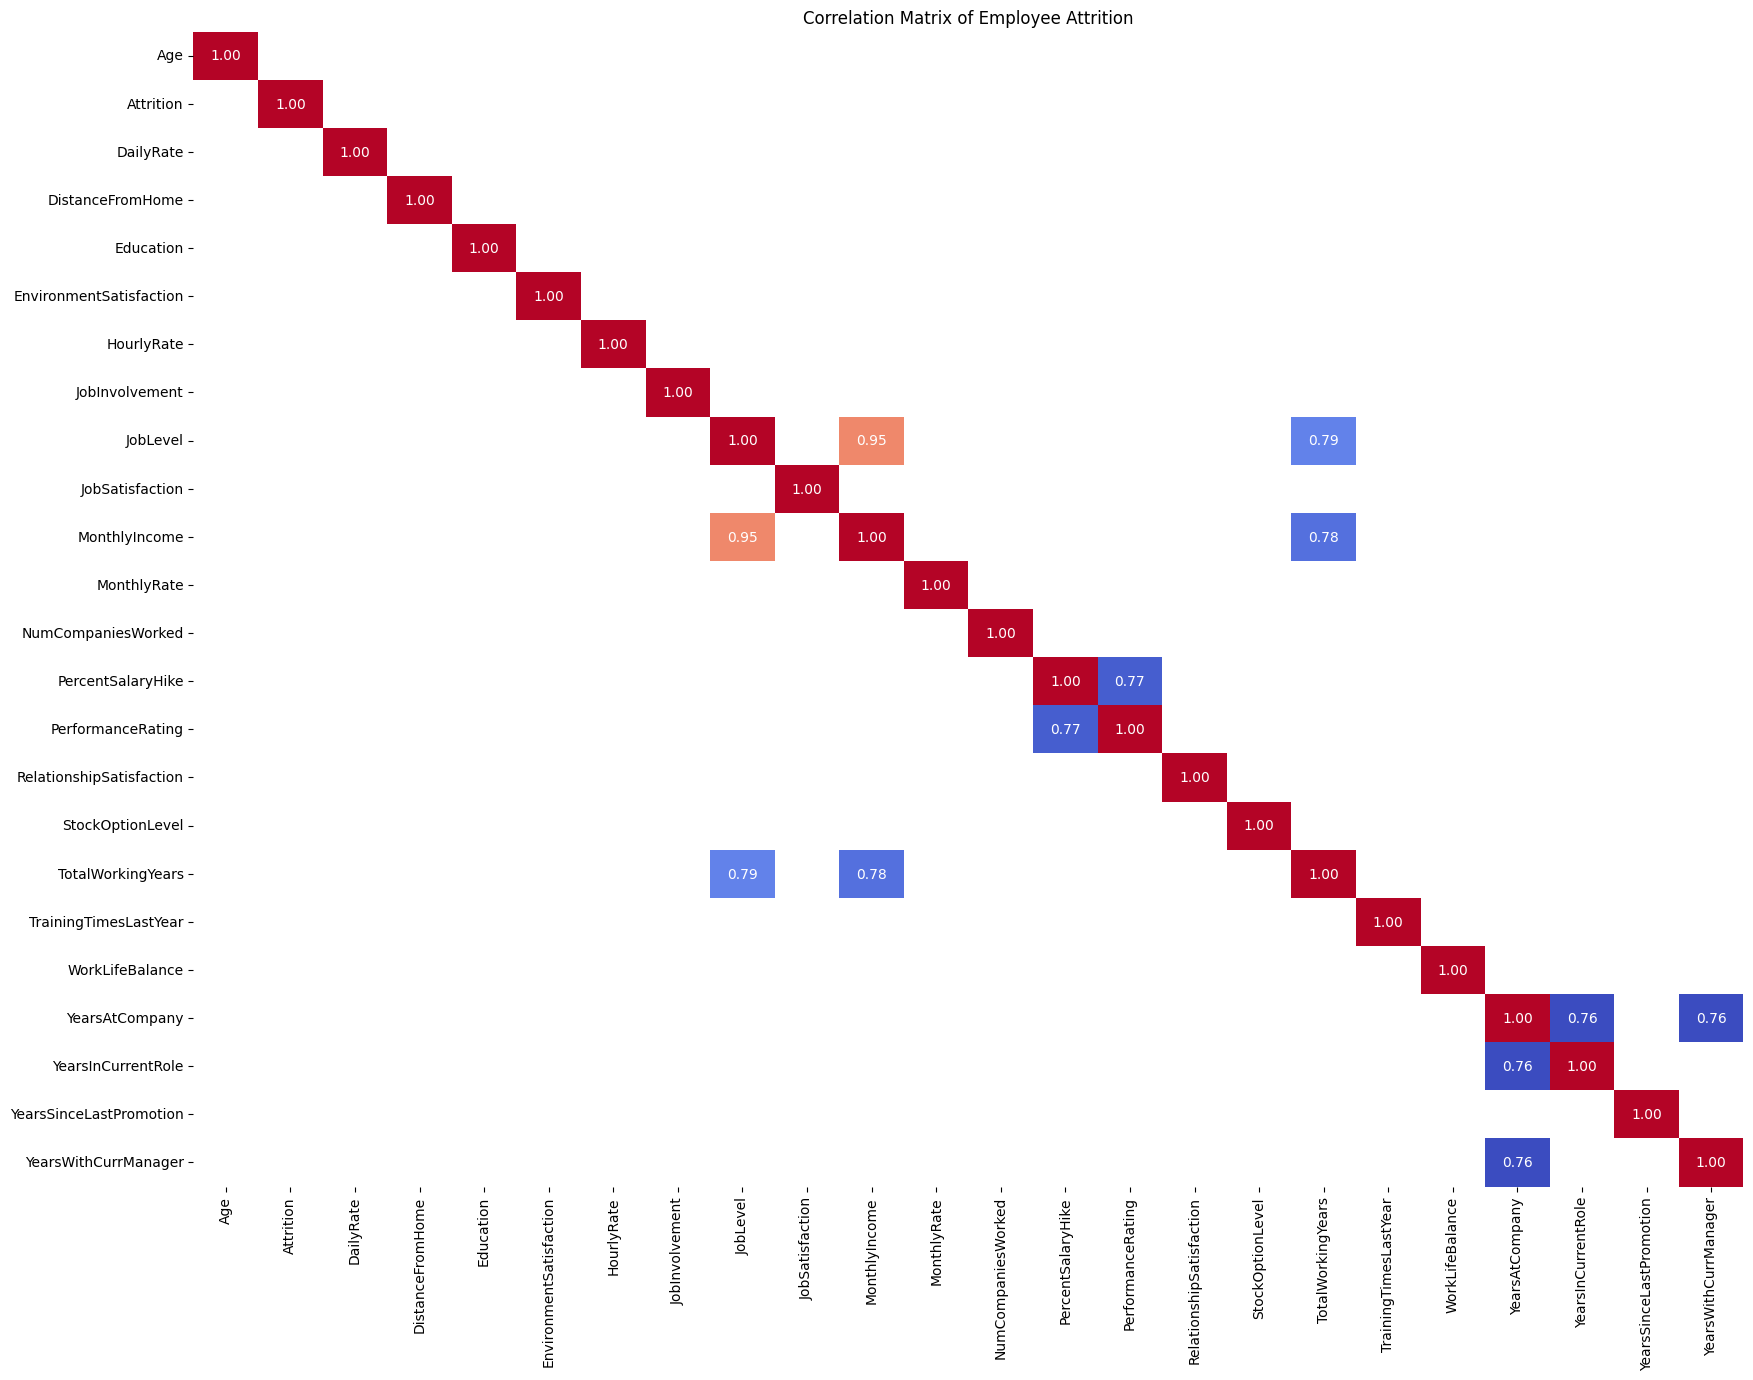

In [ ]:
correlation_matrix = df.corr().round(2)
mask = (correlation_matrix.abs() < 0.75) & (correlation_matrix.abs() > -0.75)
correlation_matrix[mask] = np.nan
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Matrix of Employee Attrition')
plt.show()

Based on the correlation matrix above, several correlations can be seen, such as:
- MonthlyIncome has a strong positive correlation to JobLevel of 0.95.
- MonthlyIncome has a strong positive correlation to TotalWorkingYears of 0.78.

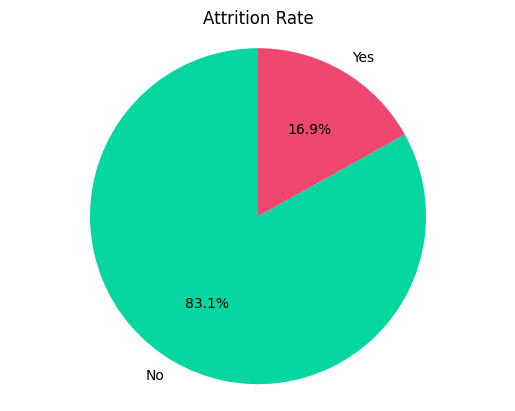

In [ ]:
df['Attrition'] = df['Attrition'].replace({1: 'Yes', 0: 'No'})

# Calculating the number of employees who experienced attrition and who are still active
attrition_count = df['Attrition'].value_counts()
attrition_rate = attrition_count / len(df) * 100

# Create plots
fig, ax = plt.subplots()
ax.pie(attrition_count, labels=attrition_count.index, autopct='%1.1f%%', startangle=90, colors=['#06D6A0', '#EF476F'])
ax.axis('equal')
ax.set_title('Attrition Rate')
plt.show()

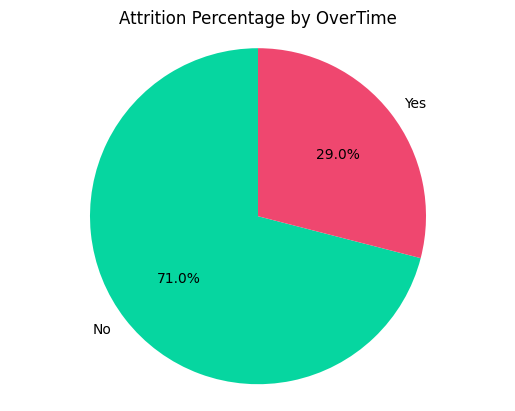

In [ ]:
attritionByOverTime = df.groupby(by='OverTime').agg({'Attrition': 'count'}).reset_index()
attritionByOverTime_sorted = attritionByOverTime.sort_values(by='Attrition', ascending=False)

attritionByOverTime_sorted['OverTime'] = attritionByOverTime_sorted['OverTime'].replace({0: 'No', 1: 'Yes'})

plt.pie(attritionByOverTime_sorted['Attrition'], labels=attritionByOverTime_sorted['OverTime'], autopct='%1.1f%%', startangle=90, colors=['#06D6A0', '#EF476F'])
plt.axis('equal')
plt.title('Attrition Percentage by OverTime')
plt.show()

<ipython-input-103-d6ae9caaffe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Attrition', data=attritionByAge_sorted, palette='viridis')


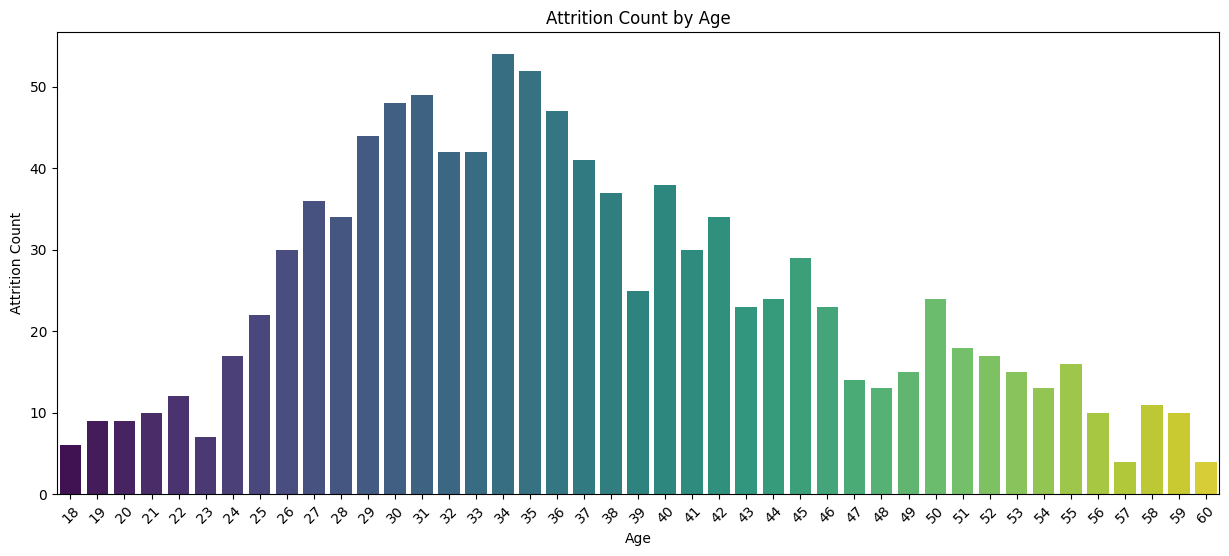

In [ ]:
attritionByAge = df.groupby(by='Age').agg({'Attrition': 'count'}).reset_index()

attritionByAge_sorted = attritionByAge.sort_values(by='Attrition', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='Attrition', data=attritionByAge_sorted, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Attrition Count')
plt.title('Attrition Count by Age')
plt.xticks(rotation=45)
plt.show()

## Data preprocessing

In [ ]:
# Identifies categorical columns
categorical_column = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_column.append(column)

In [ ]:
# Convert the 'Attrition' column to a categorical data type and convert categorical values ​​to integers
df['Attrition'] = df.Attrition.astype("category").cat.codes

# Removed the 'Attrition' column from the categorical column list after converting it to an integer
categorical_column.remove('Attrition')

In [ ]:
label = LabelEncoder()
for column in categorical_column:
    df[column] = label.fit_transform(df[column])

## Random Forest Modelling

In [ ]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
random_forest.fit(X_train, y_train)

train_pred = random_forest.predict(X_train)
test_pred = random_forest.predict(X_test)

train_acc = accuracy_score(y_train, train_pred) * 100
test_acc = accuracy_score(y_test, test_pred) * 100

print(f"Train Accuracy Score: {train_acc:.2f}%")
print(f"Test Accuracy Score: {test_acc:.2f}%")

Train Accuracy Score: 100.00%
Test Accuracy Score: 84.53%


## Evaluation

In [ ]:
print("Classification Report:")
print("Train:\n", classification_report(y_train, train_pred))
print("Test:\n", classification_report(y_test, test_pred))

Classification Report:
Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       129

    accuracy                           1.00       793
   macro avg       1.00      1.00      1.00       793
weighted avg       1.00      1.00      1.00       793

Test:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       215
           1       1.00      0.18      0.31        50

    accuracy                           0.85       265
   macro avg       0.92      0.59      0.61       265
weighted avg       0.87      0.85      0.80       265



--- End of code ---